# Area Plot (Alan Grafiği)

Çizgi grafiğin (Line Plot) eksen ile çizgi arasının doldurulması ile elde edilmiş hali olarak tanımlanabilir. <code>df.plot(kind="area")</code> ile grafik tipi belirtilerek oluşturulur.

Örnekte kullandığımız veri setine ulaşmak için: 

https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp

In [1]:
import numpy as np
import pandas as pd

## Datanın oluşturulması

In [2]:
# Grafikte kullanacağımız datayı yükleyelim.
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
# Bize gerekli olmayan kolonları silelim
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
# Kolon isimlerini değiştirelim
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# Kolon isimlerini string yapalım
df_can.columns = list(map(str, df_can.columns))
# Country kolonunu index yapalım
df_can.set_index('Country', inplace=True)
# Index adını silelim
df_can.index.name=None
# Göçmen sayısın toplamını gösteren Total isimli bir kolon ekleyelim
df_can['Total'] = df_can.sum(axis=1)
# Grafik çizerken kullanmak üzere years adınsa bir dizi oluşturalım
years = list(map(str, range(1980, 2014)))

## Grafiğin oluşturulması

In [3]:
%matplotlib inline

import matplotlib as mlp
import matplotlib.pyplot as plt

mlp.style.use("ggplot")


***Kanadaya  en çok göçmen veren ilk beş ülkenin yıllara göre göçmen sayısını gösteren bir grafik çizelim***

In [4]:
# Dateseti en çok göç veren ülkenden en aza olacak şekilde sıralayalım.
df_can.sort_values(["Total"],ascending=False,axis=0,inplace=True)

# En fazla göç veren 5 ülkeden oluşan bir yeni dataset yaratalım
df_top5=df_can.head()

df_top5


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [5]:
# Grafik çizerken ülkelerin yıllara göre değişimini inceleyeceğimiz için dataframe'i transpose edeceğiz.
df_top5=df_top5[years].transpose()

In [6]:
df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


In [7]:
# Index alanını integer yapalım
df_top5.index=df_top5.index.map(int)

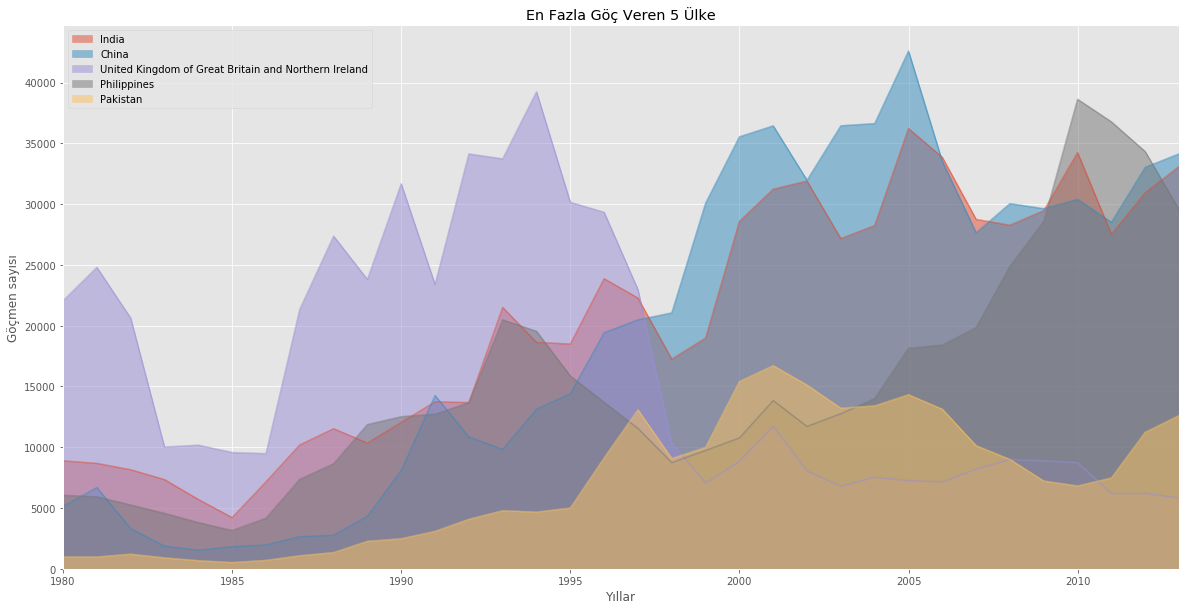

In [8]:
# Grafiği çizdirelim

df_top5.plot(kind="area",stacked=False,figsize=(20,10))

plt.title("En Fazla Göç Veren 5 Ülke")
plt.xlabel("Yıllar")
plt.ylabel("Göçmen sayısı")

plt.show()

***Kanada'ya bu yıllar arasında en az göçmen veren ilk 5 ülkenin yıllara göre göçmen sayısını gösteren grafiği çizdirelim***

In [9]:
# Bu sefer küçükten büyüğe doğru sıralayalım ana veri setimizi
df_can.sort_values(["Total"],ascending=True,axis=0,inplace=True)
# İlk 5 kaydı alıp yeni bir dataset yaratalım
df_least5=df_can.head()
# DataSeti Transpose edelim
df_least5=df_least5[years].transpose()
# Index kolonundaki verileri integer yapalım
df_least5.index=df_least5.index.map(int)

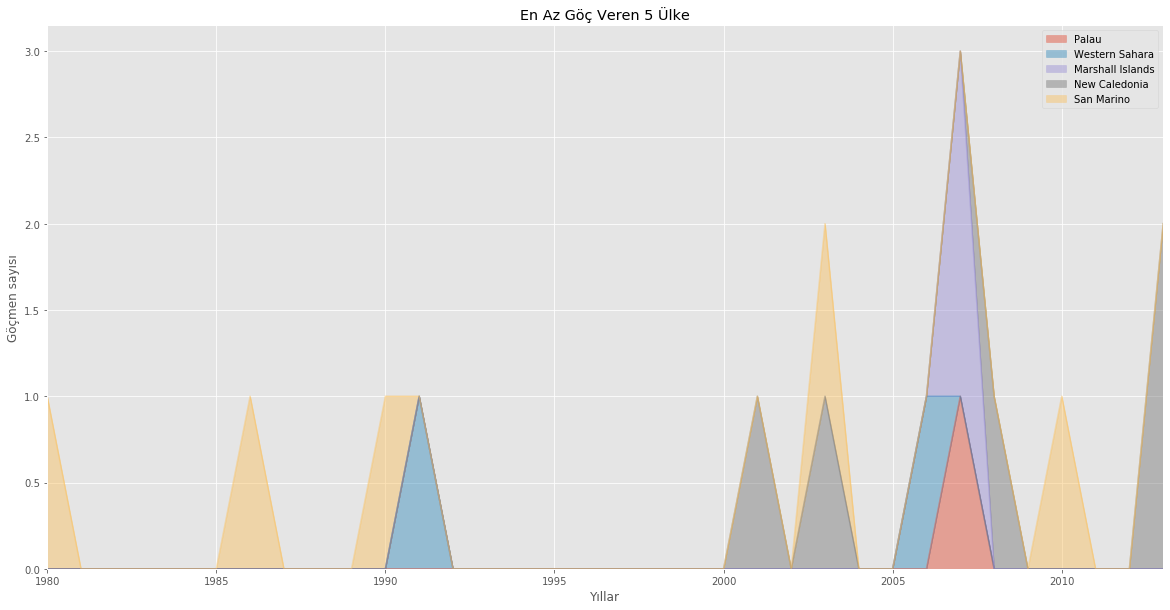

In [10]:
# Buaradaki alpha parameresi transparn olmasını ve onun derecesini belirler
df_least5.plot(kind="area", alpha=0.45,figsize=(20,10))


plt.title("En Az Göç Veren 5 Ülke")
plt.xlabel("Yıllar")
plt.ylabel("Göçmen sayısı")

plt.show()

Aynı grafiği matplotlib'in ***artist*** katmanını kullanarak ta çizdirebiliriz. Bu bize duruma göre daha fazla değişiklik imkanı sağlar.

Text(0, 0.5, 'Göçmen sayısı')

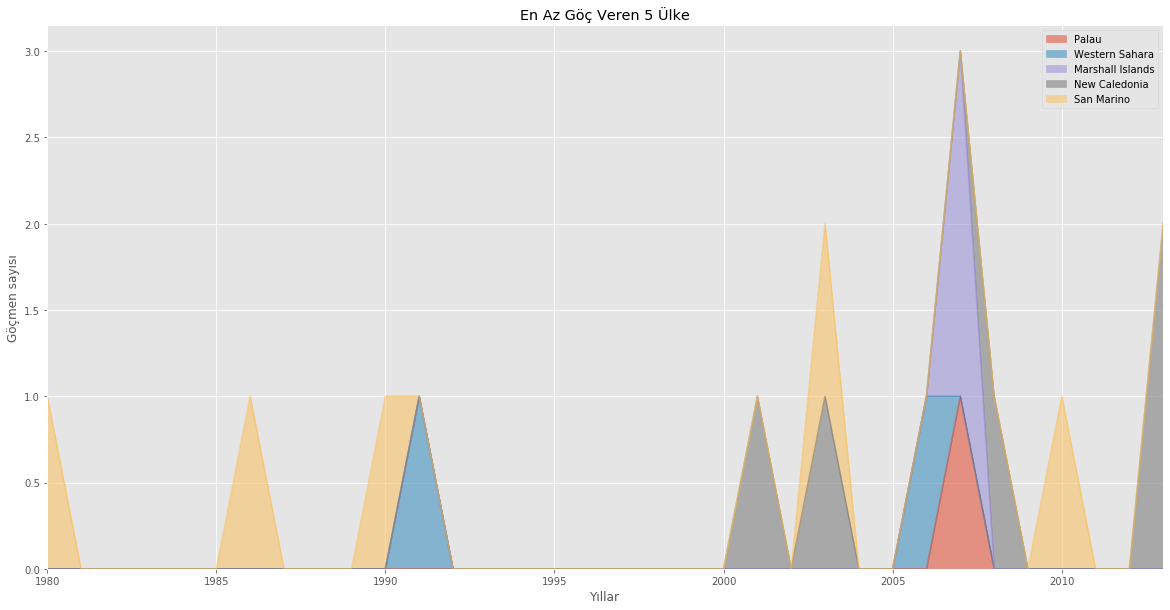

In [11]:
ax=df_least5.plot(kind="area",alpha=0.55,figsize=(20,10))

ax.set_title("En Az Göç Veren 5 Ülke")
ax.set_xlabel("Yıllar")
ax.set_ylabel("Göçmen sayısı")
